<a href="https://colab.research.google.com/github/Luciano1120/Python_L/blob/main/PreEntregaProyectoFinal_LucianoScorza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

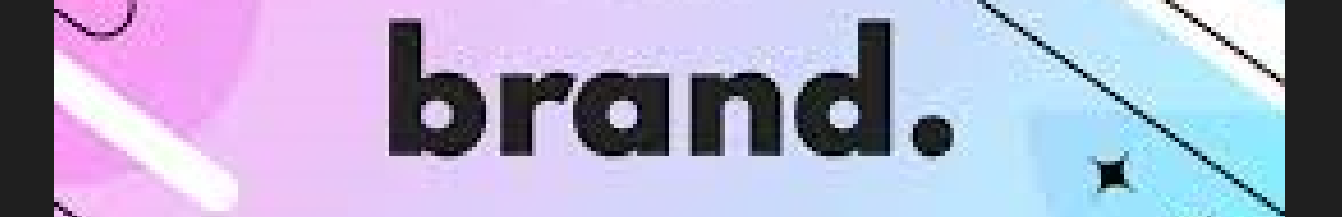

#Abstracto

El Proyecto trata de una Distribuidora de electrodmesticos. La cual tiene una amplia diversidad de Clienes (en el Orden de los 4000) , Proveedores (en el Orden de los 300) y Productos (en el Orden de los 10.000).

La empresa distribuye Productos a nivel Nacional a traves de aproximadamente 50 viajantes de Comercio.

Dentro de lo Productos comercializables tenemos Eletrodomesticos, Muebles, Articulos de Audio,Tecnología, Aire Libre y demás Categorías

El dataset principal contiene la estadistica de ventas del año 2022.
Donde dentro de los campos mas relevantes tenemos, la Fecha, Codigo del Item, Codigo del Cliente, Caracteristicas de los Items, Ejecutivo q realizó la venta, el Viajante al q se le asignó la venta, y demás

A este dataset se lo complmenta con otros datasets q permitirán obtener una cantidad de Features q enriquezcan el Proyecto. Debajo una breve descripción de los mismos

Datasets:


data: estadistica de ventas del año 2022 (Tabla de Hechos)

dataCab: cabecera de las Facturas

dataT: con variable Target 

dataA: incorpora atributos de los clientes (descriptos debajo con el Metodo Column)

dataC: incorpora el Credito del Cliente al momento

dataDC: incorpora datos del  domicilio del Cliente

dataFD: permite traer informacion logisitca acerca de la fecha de expedición de los remitos

dataPV: informacion referida a los reclamos por postvta


#Importamos Librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go # importamos los objetos de plotly

import folium  # llamamos a la libreria 
from folium.plugins import HeatMap # a un elemento en particular
from geopy.geocoders import Nominatim

from sklearn.impute import SimpleImputer

#Importamos DataSets

In [3]:
#EstadVta con Detalle Item
urlOD2022='https://onedrive.live.com/download?resid=68e1f46f4ff0ff93%212687&authkey=AD5bm_4-hFTHX8Q&em=2&em=Z&app=Excel'
data=pd.read_excel(urlOD2022)

#Target
urlT='https://onedrive.live.com/download?resid=68e1f46f4ff0ff93%212768&authkey=AIfPd4wybcORgro&em=2&em=Z&app=Excel'
dataT=pd.read_excel(urlT)


#CreditoClientes
urlOD3='https://onedrive.live.com/download?resid=68e1f46f4ff0ff93%212698&authkey=AJEDS5qMED37pPA&em=Z&app=Excel'
dataC=pd.read_excel(urlOD3)

#AtribClientes
urlOD2='https://onedrive.live.com/download?resid=68e1f46f4ff0ff93%212697&authkey=APtH7aVbnOjnoXY&em=Z&app=Excel'
dataA=pd.read_excel(urlOD2)

#FechaDespachoCliente
urlOD5='https://onedrive.live.com/download?resid=68e1f46f4ff0ff93%212706&authkey=ABf_wV89k7TPDjA&em=2&em=Z&app=Excel'
dataFD=pd.read_excel(urlOD5) #d 4

#PostVta
urlOD6='https://onedrive.live.com/download?resid=68e1f46f4ff0ff93%212704&authkey=AC3YnON6DNVfLD8&em=2&em=Z&app=Excel'
dataPV=pd.read_excel(urlOD6)


#Incorporacion del Dataset atraves de la API

Dejo enlace al colab donde se hace la conexion. En este colab solo traigo el Dataset Limpio para no alargar el Notebook.

[Colab q muestra Conexion con Api](https://colab.research.google.com/drive/19-t-whGSKYJNQrc78-xpk3Kgd3XPsQ0N?usp=sharing)

In [6]:
#Domicilio CLiente- Tabla nuevo traido del Api
#dejo de buckup esta conexion por si se me rompe la conexion APi el finde 
url_dom_api='https://onedrive.live.com/download?resid=68e1f46f4ff0ff93%212769&authkey=AJm4usqtwRlPJkM&em=2&em=Z&app=Excel'
dataD=pd.read_pickle(url_dom_api) 

#Depuracion Dataset

##Data Sets a combinar

1. dataA: incorpora atributos de los clientes (descriptos debajo con el Metodo Column)
2. dataC: incorpora el Credito del Cliente al momento
3. dataDC: incorpora datos referidos al domicilio del Cliente (Con la Api)
4. dataFD: permite traer informacion logisitca acerca de la fecha de expedición de los remitos
4. dataPV: informacion referida a los reclamos por postvta

##Armamos la Cabecera de la Factura

Es decir Cada Factura en una linea para permitir el Join con el DataSet q contiene el Target

In [4]:
#EstadVta- #Agrupar por Fc

data['PK']=data['EMPRESA'].astype('str')+data['COMP']+data['PREFIJO'].astype('str')+data['NUMERO'].astype('str') #unsupported operand type(s) for +: 'int' and 'str'


dataCab=data.groupby(['PK','FECHA','CODCLIENTE', 'NOMCLIENTE', 'VENDEDOR', 'COMP','PREFIJO', 'NUMERO'])['CANTIDAD','IMPORTENETO', 'IMPUESTOS', 'BONIFICACION1','COSTO','COMISION$'].sum().reset_index()
dataCab

<ipython-input-4-acc76ea97350>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataCab=data.groupby(['PK','FECHA','CODCLIENTE', 'NOMCLIENTE', 'VENDEDOR', 'COMP','PREFIJO', 'NUMERO'])['CANTIDAD','IMPORTENETO', 'IMPUESTOS', 'BONIFICACION1','COSTO','COMISION$'].sum().reset_index()


,PK,FECHA,CODCLIENTE,NOMCLIENTE,VENDEDOR,COMP,PREFIJO,NUMERO,CANTIDAD,IMPORTENETO,IMPUESTOS,BONIFICACION1,COSTO,COMISION$
0,1CA1376,2022-01-14,4437,GOMEZ BRENDA YANET ...,41,CA,1,376,-1,-363.06,0.0,0.0,0.0,0.0000
1,1CA1377,2022-01-17,2554,VILANOVA S.A. ...,5,CA,1,377,-1,-15194.11,0.0,0.0,0.0,0.0000
2,1CA1378,2022-02-04,4649,FURLAN JOSE Y GONZALEZ JORGE S.H ...,46,CA,1,378,-1,-2454.97,0.0,0.0,0.0,0.0000
3,1CA1380,2022-02-11,4159,RAMOS LAURA MARIEL ...,41,CA,1,380,-1,-911.70,0.0,0.0,0.0,0.0000
4,1CA1385,2022-03-07,2551,VIGNATTI EDUARDO LUIS ...,41,CA,1,385,-1,-521.12,0.0,0.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36291,2VB5094,2022-05-02,3659,BELTRAMO YANINA DEL VALLE ...,39,VB,50,94,-1,-340669.93,0.0,0.0,0.0,-20440.1958
36292,2VB5095,2022-05-02,5298,BARXELL & BARXELL SOCIEDAD SIMPLE ...,27,VB,50,95,-1,-180000.01,0.0,0.0,0.0,-10800.0006
36293,2VB5096,2022-05-02,831,EL HOGAR DESEADO S.A. ...,304,VB,50,96,-14,-128999.98,0.0,0.0,0.0,-7739.9988
36294,2VB5097,2022-05-02,341,BRAUM MIGUEL ANGEL ...,304,VB,50,97,-14,-131899.99,0.0,0.0,0.0,-7913.9994


##Adaptamos el Campo con el cual voy a combinar los datasets

Revisamos el tipo de dato en Cada Dataset


In [29]:
data['CODCLIENTE'].dtype #mismo tipo de dato-      4 digitos- Se debe Agrupar - Estad Vta
dataC['CODCLIENTE'].dtype #mismo tipo de dato-     4 digitos                 - Credito  
dataA['CODCTACTE'].dtype #mismo tipo de dato -     8 digitos                 - Atributos
dataD[0].dtype #mismo tipo de dato -    8 digitos                 - Domicilio
dataFD['N° de Cliente'].dtype #mismo tipo de dato- 4 digitos                  -Fecha Despacho
dataPV['codcli'].dtype #mismo tipo de dato        -8 digitos - Se debe Agrupar- PostVta
dataCab['CODCLIENTE'].dtype

dtype('O')

##Emparejo el Campo de Union (CodCliente)

Llevo el Campo Codigo de CLiente a 8 Digitos

In [8]:
#Agrego ceros a data
data['CODCLIENTE']=data['CODCLIENTE'].astype('str')
data['LARGO']=data['CODCLIENTE'].apply(len) #lo saco para cada registro en la columna
data['AGREGA_0']=data['LARGO'].apply(lambda x: '0000' if x== 4 else ('00000' if x==3 else ('000000' if x==2 else '0000000'))) #x es una variable q guarda el Campo (en este caso LARGO)
data['CODCLIENTE']=data['AGREGA_0']+data['CODCLIENTE']

#Agrego ceros a dataC
dataC['CODCLIENTE']=dataC['CODCLIENTE'].astype('str')
dataC['LARGO']=dataC['CODCLIENTE'].apply(len) #lo saco para cada registro en la columna
dataC['AGREGA_0']=dataC['LARGO'].apply(lambda x: '0000' if x== 4 else ('00000' if x==3 else ('000000' if x==2 else '0000000'))) #x es una variable q guarda el Campo (en este caso LARGO)
dataC['CODCLIENTE']=dataC['AGREGA_0']+dataC['CODCLIENTE']
dataC=dataC[['CODCLIENTE','IMPORTECREDITOTOTAL']]

#Agrego ceros a dataFD
dataFD['N° de Cliente']=dataFD['N° de Cliente'].astype('str')
dataFD['LARGO']=dataFD['N° de Cliente'].apply(len) #lo saco para cada registro en la columna
dataFD['AGREGA_0']=dataFD['LARGO'].apply(lambda x: '0000' if x== 4 else ('00000' if x==3 else ('000000' if x==2 else '0000000'))) #x es una variable q guarda el Campo (en este caso LARGO)
dataFD['N° de Cliente']=dataFD['AGREGA_0']+dataFD['N° de Cliente']


##Agrupo los Dataset necesarios

In [9]:
dataQVend=data[['CODCLIENTE','CANTIDAD','IMPORTENETO','IMPUESTOS']].groupby('CODCLIENTE').sum().reset_index()
campos_a_sumar=dataQVend[['IMPORTENETO','IMPUESTOS']]
dataQVend['TOTAL_VENTA']=campos_a_sumar.sum(axis=1)
dataQVend=dataQVend[['CODCLIENTE', 'CANTIDAD', 'TOTAL_VENTA']]

dataQPV=dataPV[['codcli','Unidad']].groupby('codcli').sum().reset_index()


##Joins

In [10]:
df_CombPv=pd.merge(dataQVend,dataQPV, how='left', left_on='CODCLIENTE', right_on='codcli') # combina principal + Pv
df_CombPv_C=pd.merge(df_CombPv,dataC, how='left', left_on='CODCLIENTE', right_on='CODCLIENTE') #combina anterior + credito 
df_CombPv_C_DC=pd.merge(df_CombPv_C,dataDC, how='left', left_on='CODCLIENTE', right_on=0) #combina anterior + domicilio
df_CombPv_C_DC_A=pd.merge(df_CombPv_C,dataA, how='left', left_on='CODCLIENTE', right_on='CODCTACTE') #combina anterior + Atributos
df_CombPv_C_DC_A.shape

(1837, 20)

##Defino el DataSet Conmbinado

In [11]:
df_def=df_CombPv_C_DC_A[['CODCLIENTE', 'CANTIDAD', 'Unidad', 'IMPORTECREDITOTOTAL','TOTAL_VENTA', 'NOMBRE CLIENTE', 'CUIT', 'PLAZO', 'SUSPENDIDO',
       'FECHAALTA', 'AUTORIZA', 'VENDEDOR', 'TIPO', 'PROVINCIA', 'CATEGORIA',
       'EJEC. ELECTRO', 'EJEC.MUEBLES', 'EJEC.COMPO']]

names = {'CANTIDAD':'CANT_VEND', 'Unidad':'CANT_RECLAMO'}
df_def.rename(columns=names, inplace=True) # renombramos la columna para que coincidan

df_def.columns

<ipython-input-11-ec979acc8e68>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def.rename(columns=names, inplace=True) # renombramos la columna para que coincidan


Index(['CODCLIENTE', 'CANT_VEND', 'CANT_RECLAMO', 'IMPORTECREDITOTOTAL',
       'TOTAL_VENTA', 'NOMBRE CLIENTE', 'CUIT', 'PLAZO', 'SUSPENDIDO',
       'FECHAALTA', 'AUTORIZA', 'VENDEDOR', 'TIPO', 'PROVINCIA', 'CATEGORIA',
       'EJEC. ELECTRO', 'EJEC.MUEBLES', 'EJEC.COMPO'],
      dtype='object')

##Aplico SimpleImputer

Para reemplazar Nulos con el valor 0

In [12]:
from sklearn.impute import SimpleImputer

valores1=df_def[['TOTAL_VENTA','CANT_RECLAMO', 'IMPORTECREDITOTOTAL','CANT_VEND']].values #lo vuelca en un arreglo de numpy de 2 dimensiones
imputador = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0 )
transformados2 = imputador.fit_transform(valores1) #metodo de simpleimputer para aplicar la transformacion, requiere de un arreglo de 2 dimensiones
transformados2=pd.DataFrame(transformados2) #se vuelve a armar el dataframe
df_def1= transformados2.rename(columns={0: "TOTAL_VENTA", 1: "CANT_RECLAMO", 2: "IMPORTECREDITOTOTAL",3: "CANT_VEND"}) #renombramos nombre de campos

#EDA
Analizamos la Distribucion de algunas Variables y sus Valores Atipicos

##Analizamos la Variable **Cantidad** 

Efectuamos un Histograma para ver la distribucion de la variable en analisis, y no alcamzamos a ver su distribucion de forma clara, es por eso q seguimos analizando la variable atraves de un boxplot para ver si hay atipicos ensuciando la distribucion y luego ver si corresponde analizar nuevamente con otro histrograma sin dichos atipicos

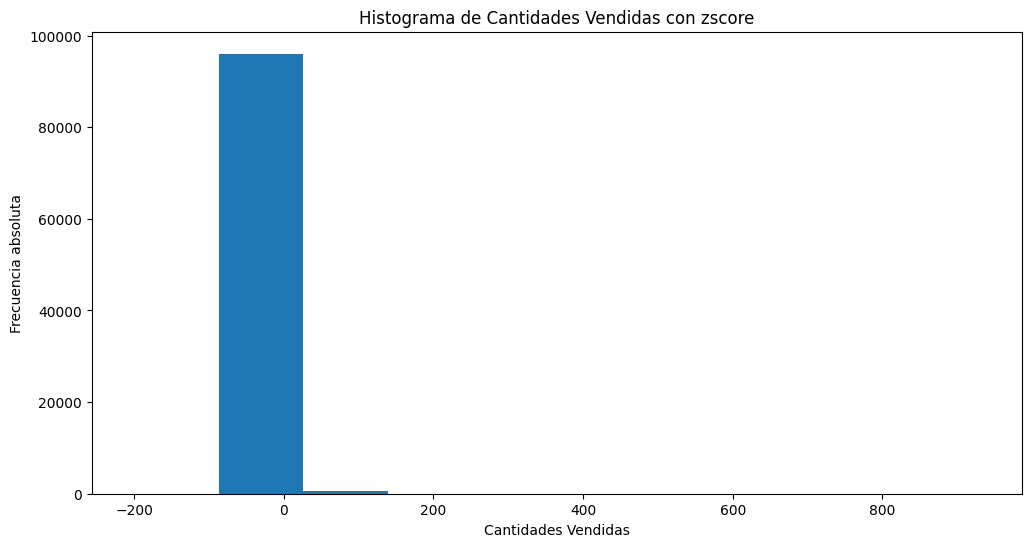

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(data['CANTIDAD'], bins=10) #bins es la cantidad de contenedores o clases q quiero tener
ax.set_title('Histograma de Cantidades Vendidas con zscore')
ax.set_xlabel('Cantidades Vendidas')
ax.set_ylabel('Frecuencia absoluta')
plt.show()

###Efectuamos un BoxPlot 

Vemos en el Boxplot la presencia de Atipicos  lo q me confirma la presencia de atipicos afectando la Visualizacion del Histograma

count    96611.000000
mean         2.269535
std          8.247447
min       -200.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        930.000000
Name: CANTIDAD, dtype: float64


<Axes: xlabel='CANTIDAD'>

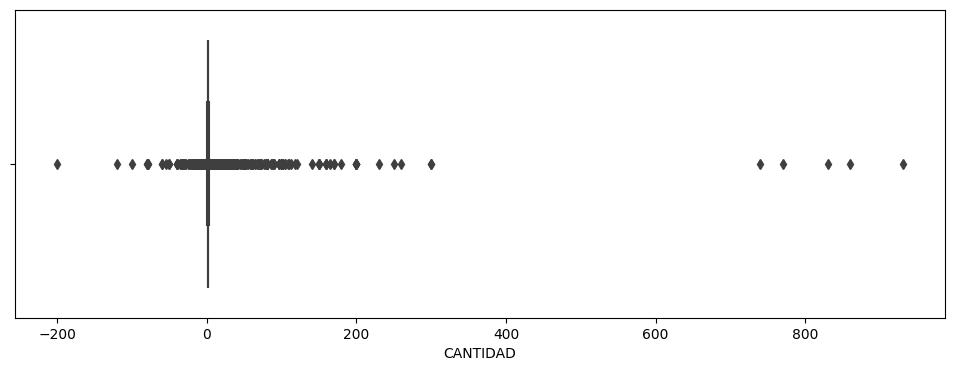

In [14]:
fig, ax = plt.subplots(figsize=(12, 4))

data['CANTIDAD']=data['CANTIDAD'].astype('int')
print(data['CANTIDAD'].describe())

sns.boxplot(data=data, x=data['CANTIDAD'])


Visualizamos la Variable sin sus valores atipicos, viendo q los bigotes van de 0 a 3 y su rango intercuartilico entre 1 y 2

<Axes: xlabel='CANTIDAD'>

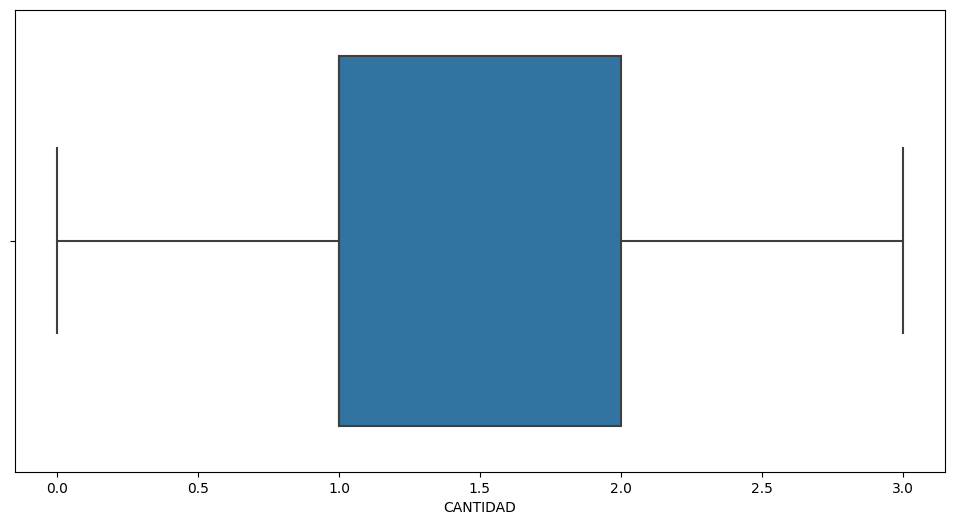

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(data=data, x=data['CANTIDAD'],showfliers=False) #quitamos los atipicos para no afectar la visualizacion

##Analizamos la Correlacion entre la Variable Importe Total y el Credito del Cliente

Buscando ver si a mayor Credito mayor es el Importe Vendido y vemos q  hay una correlacion leve , lo q permite avanzar para profundizar dicha hipotesis dicha Hipotesis

<Axes: xlabel='IMPORTECREDITOTOTAL', ylabel='TOTAL_VENTA'>

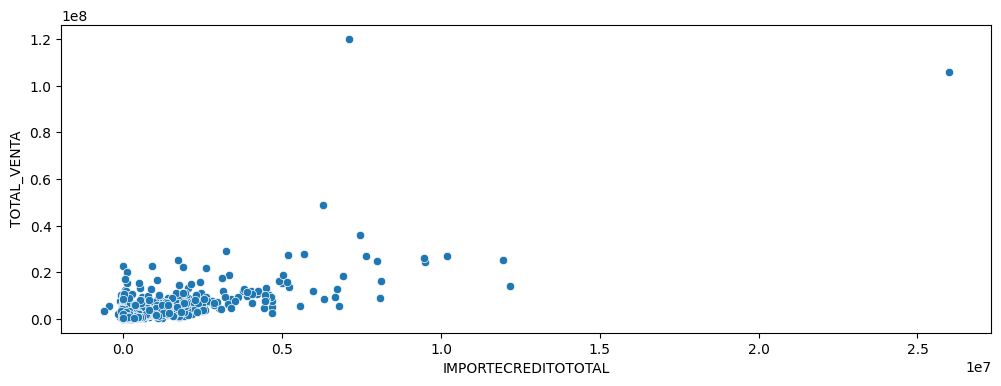

In [16]:
#df_def_cre=df_def[['CODCLIENTE', 'IMPORTECREDITOTOTAL']].unique() #ver como de aplicar un distinct a 2 campos
fig,ax= plt.subplots(figsize=(12, 4)) 
sns.scatterplot(data=df_CombPv_C_DC_A, y='TOTAL_VENTA', x='IMPORTECREDITOTOTAL') #la variable IMPORTECREDITOTOTAL tenia espacios en el excel (se los quito desde allí) y era considera como string y afecta al scatter no mostrando correlacion
#es necesario agrupar las ventas por clientes para ver correlacion con el Credito

Comprobamos una leve Correlacion entre las variables aplicando la matriz de Correlacion nos da un 0.36

In [17]:
from sklearn.impute import SimpleImputer
from numpy import nan
from numpy import isnan


df_CombPv_C_DC_A['TOTAL_VENTA'].dtype
df_CombPv_C_DC_A['IMPORTECREDITOTOTAL'].dtype #pasar a float
df_CombPv_C_DC_A['IMPORTECREDITOTOTAL'].astype('float') #lo paso a float por mas q haya nulos pero corre instruccion pero no me convierte
#df_Vta=df_corr_vtaxcl_y_cred['IMPORTECREDITOTOTAL'].dropna() #si lo uso me rompe el shape para el analisis de correlacion al quitarme los registros

valores=df_CombPv_C_DC_A[['TOTAL_VENTA','IMPORTECREDITOTOTAL']].values
imputador = SimpleImputer(missing_values=np.nan, strategy='mean')
transformados = imputador.fit_transform(valores) #metodo de simpleimputer para aplicar la transformacion, requiere de un arreglo de 2 dimensiones
transformados=pd.DataFrame(transformados)
transformados= transformados.rename(columns={0: "TOTVTA", 1: "CREDTOT"})


np.corrcoef(transformados.TOTVTA,transformados.CREDTOT)

array([[1.        , 0.36052397],
       [0.36052397, 1.        ]])

##Analizamos otra relacion entre 2 variables. (Q Vend Vs Q Reclamadas)

Cantidad de Unidades vendidas y cantidad de Reclamos por postvta, buscando analizar la correlacion q hay, donde se plantea una hipotesis donde a priori debería existir una correlacion fuerte y una gran dependencia.

Lo estudiamos y vemos q en el Grafico de Dispersion la correlacion es positiva

<Axes: xlabel='QVendidas', ylabel='QReclamos'>

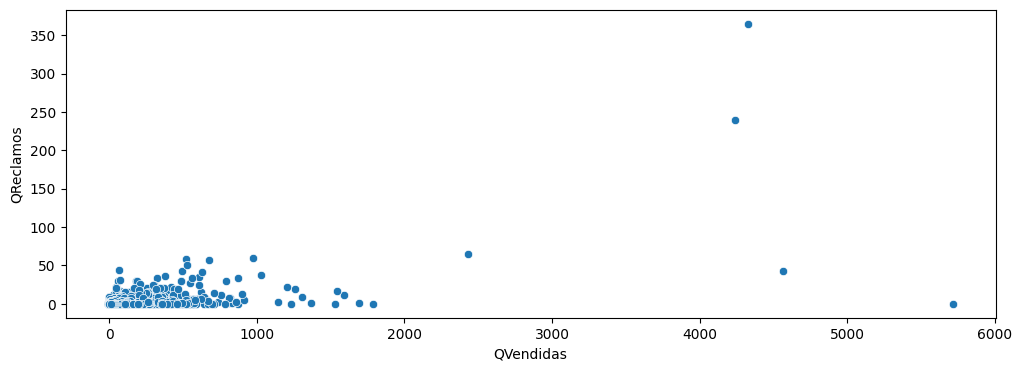

In [18]:

valores1=df_CombPv_C_DC_A[['CANTIDAD','Unidad']].values
imputador = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0 )
transformados2 = imputador.fit_transform(valores1) #metodo de simpleimputer para aplicar la transformacion, requiere de un arreglo de 2 dimensiones
transformados2=pd.DataFrame(transformados2)
transformados2= transformados2.rename(columns={0: "QVendidas", 1: "QReclamos"})

fig,ax= plt.subplots(figsize=(12, 4)) 
sns.scatterplot(data=transformados2, x='QVendidas', y='QReclamos') 


Para respaldar aun mas la Correlacion en el Grafico anterior, medimos la dispersion, lo cual es una correlacion superior a la media lo q permitiría poder pensar en alguna Regresion Lineal para analizar la dependencia de dichas variables

In [19]:
np.corrcoef(transformados2.QVendidas,transformados2.QReclamos)

array([[1.        , 0.58658516],
       [0.58658516, 1.        ]])

#Storytelling

## A quien:
Le estamos hablando a un grupo de accionistas q acaba de Invertir en el 10% de una Distribuidora. Dichos Acciones tienen un simple nocion del negocio, lo q vamos a darle un poco más de informacion acerca del mismo.


## Que: 
Pensamos en proporcionarle informacion acerca de la estadistica de ventas del año 2022 q fue un buen año para la empresa. En dicho año creció mucho en categoria de Productos vendidos, y cantidad de prodcutos vendidos a clientes más importantes

##Como:

###Visualizamos las Categorias de Productos con mayor volumen

Hacemos un zoom en las 20 Categorias con mayor volumen, viendo un gran impacto en la volumen por unidades de Pequeños electrodomesticos, viendo un emparejamiento del resto de la categorias lo cual habla de la variedad en la demanda. La empresa no depende tanto de algunas categorias si no q tiene un abanico de categorias q le da una imortante division del riesgo.

In [20]:
df_Comb=pd.merge(data,dataDC, how='left', left_on='CODCLIENTE', right_on=0)

dfagg=df_Comb.groupby(by='GR1')['CANTIDAD'].sum()
type(dfagg)
dfaggD=pd.DataFrame(dfagg).sort_values('CANTIDAD', ascending=False).head(20).reset_index()


In [21]:
fig=px.bar(dfaggD, y='CANTIDAD', x='GR1', text='CANTIDAD', color='GR1') # creamos un grafica de barras # x e y deben de provenir de un agrupamiento de la categoria
fig.update_traces(texttemplate= '%{text:.2s}', textposition='outside') # y ponemos los valores arriba de cada barra, formateado
fig.update_layout(uniformtext_minsize=8) # configuramos el tamaño de letra
fig.update_layout(xaxis_tickangle= -45) # y le damos una inclinacion
# Actualizacion para ordenar las barras por valor
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total ascending'})
fig.show()

###Visualizamos los clientes con mayor volumen en unidades vendidas

Hacemos un zoom en los 20 Clientes con mayor volumen, para cononcer cuanto tranccionan en cantidades vendidas y vemos un volumen parejo exceptuando los 4 ultimos q arrancan desde la 4.200 unidades anuales.

Esto demuestra q no dependendemos de pocos los clientes si no q la empresa cuenta con un gran abanico de clientes lo q hace a una empresa sana. 

Hablamos de unidades y no de Pesos para no inlcuir efectos inflacionarios y teniendo en cuenta q el ticket promedio no es tan dispar.

In [22]:

dfaggC=df_Comb.groupby(by='NOMCLIENTE')['CANTIDAD'].sum()
type(dfagg)
dfaggDC=pd.DataFrame(dfaggC).sort_values('CANTIDAD', ascending=False).head(20).reset_index()

df_Comb.columns


Index([          'EMPRESA',             'FECHA',        'CODCLIENTE',
              'NOMCLIENTE',          'VENDEDOR',              'COMP',
                 'PREFIJO',            'NUMERO',              'ITEM',
               'DESC_ITEM',          'CANTIDAD',            'PRECIO',
             'IMPORTENETO',         'IMPUESTOS',     'BONIFICACION1',
           'BONIFICACION2',     'PORC_COMISION',             'COSTO',
       'PORC_BONIFICACION',         'COMISION$',               'GR1',
                     'GR2',               'GR3',               'GR4',
                     'IVA',           'Imp.Int',             'Marca',
                   'Serie',            'Estado',             'Bonif',
                   'Lista',             'Expr1',                'PK',
                   'LARGO',          'AGREGA_0',                   0,
                         1,        'Trasnporte',               'Dom',
                      'CP',               'loc',              'prov'],
      dtype='object

In [23]:
fig=px.bar(dfaggDC, y='CANTIDAD', x='NOMCLIENTE', text='CANTIDAD')
fig.update_traces(texttemplate= '%{text:.2s}', textposition='outside') # y ponemos los valores arriba de cada barra, formateado
fig.update_layout(uniformtext_minsize=8) # configuramos el tamaño de letra
fig.update_layout(xaxis_tickangle= -45) # y le damos una inclinacion
# Actualizacion para ordenar las barras por valor
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total ascending'})
fig.show()

###Analizamos la distrucion dentro un Mapa de las localidades

Vemos como hay un gran concentracion de Clientes en las Zona centro principalmente y luego le sigue el Norte.

Pero con mucho potencial de poder lograr participacion en localidad en todo el pais, dado q el alcance es nacional llegando casi a tener presencia en todo el pais

In [24]:
mapa = folium.Map(location=[-50.0, -50.0], zoom_start=4.3)  # Centra el mapa en una ubicación y nivel de zoom

geolocator = Nominatim(user_agent="my-app")  # Crea una instancia del geolocalizador

localidades = df_Comb['loc'].unique()  # Obtiene las localidades únicas del DataFrame

localidad_polygons = []
for localidad in localidades:
    location = geolocator.geocode(str(localidad) + ', Argentina', timeout=10)#le doy 10"
    if location is not None:
        lat = float(location.latitude)
        lon = float(location.longitude)
        # Crea un polígono aproximado para la localidad
        polygon = [[lat, lon], [lat, lon+0.1], [lat+0.1, lon+0.1], [lat+0.1, lon]]
        localidad_polygons.append(polygon)


# Paso 4: Calcular la medida para cada código postal y crear el HeatMap
#heat_data = df_Comb.groupby(['LOCALIDAD'])['CANTIDAD'].sum().reset_index()  # Agrupa y calcula la medida deseada
#heat_map = HeatMap(data=heat_data, radius=10)

for polygon in localidad_polygons:
    folium.Polygon(locations=polygon, color='blue', fill=True, fill_opacity=0.2).add_to(mapa) 

#ver opcion de mapa de calor y de centrarlo en coordnadas de argentina
mapa



###Vemos con un Grafico de **LINEAS**  como la tendencia de la Venta de Bicicletas es muy estacional, a los meses de Julio y Agosto por las visperas de día del Niño y en las Fiestas

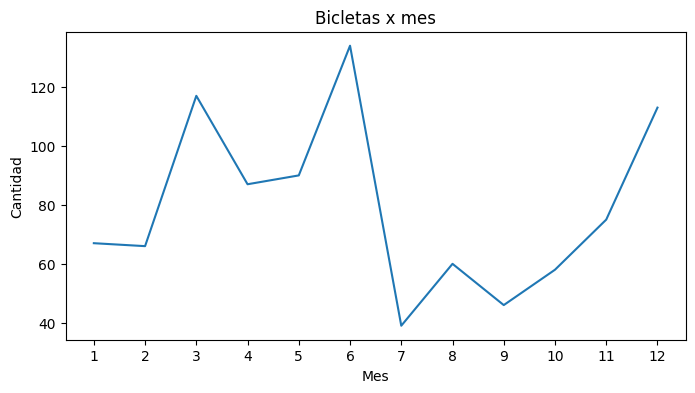

In [10]:
data["Mes1"]=pd.to_datetime(data['FECHA']).dt.month

data['GR1']=data['GR1'].str.strip() #quito espacios en blanco para los elementos del campo

arr=np.sort(data['GR1'].unique())

databici=data.query("GR1=='BICICLETAS'")#quitar espacios

data1=databici[['CANTIDAD','Mes1']]

#dataMes= databici['Mes1']

q_acumuladas = data1.groupby('Mes1').sum('CANTIDAD')
#q_acumuladas #tiene una salida por pantalla

#data1.sample(5)

y=q_acumuladas['CANTIDAD']

#x=[1,2,3,4,5,7,8,10,11,12] #era una alternativa para el Eje x- solo puse los meses q tenian cantidad para q no de error las diferentes formas de las series la de Mes y la de CANTIDAD
x=q_acumuladas.index.astype('str') #convierto el tipo de dato de Mes de period a str dado q no permite hacerlo como period, ya q acepta str o numerico
                                   #se toma indice como eje x q es la fecha. podria resetear los indices y llamar al campo  
                                   
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, y) #los ejes previamente los guarde en variables
#1er argumento es eje X y el 2do el Eje Y

ax.set_title('Bicletas x mes')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Mes')
plt.show()

###Estacionalidad de Heladeras y Freezers

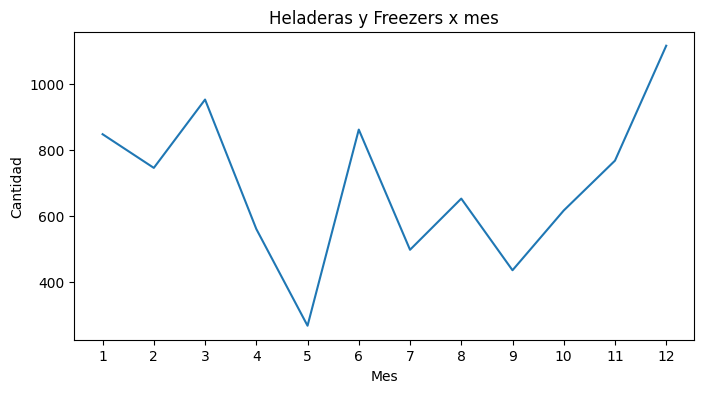

In [12]:
data["Mes1"]=pd.to_datetime(data['FECHA']).dt.month

data['GR1']=data['GR1'].str.strip() #quito espacios en blanco para los elementos del campo


databici=data.query("GR1 in ('HELADERAS','FREZEER')")#quitar espacios

data1=databici[['CANTIDAD','Mes1']]

#dataMes= databici['Mes1']

q_acumuladas = data1.groupby('Mes1').sum('CANTIDAD')
#q_acumuladas #tiene una salida por pantalla

#data1.sample(5)

y=q_acumuladas['CANTIDAD']

#x=[1,2,3,4,5,7,8,10,11,12] #era una alternativa para el Eje x- solo puse los meses q tenian cantidad para q no de error las diferentes formas de las series la de Mes y la de CANTIDAD
x=q_acumuladas.index.astype('str') #convierto el tipo de dato de Mes de period a str dado q no permite hacerlo como period, ya q acepta str o numerico
                                   #se toma indice como eje x q es la fecha. podria resetear los indices y llamar al campo  
                                   
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, y) #los ejes previamente los guarde en variables
#1er argumento es eje X y el 2do el Eje Y

ax.set_title('Heladeras y Freezers x mes')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Mes')
plt.show()

###Vemos con un Grafico de **BARRAS** como la tendencia de de uniadades vendidad se pronuncia sobre la mitdad del año, y se hace más fuerte sobre los meses de fin año, producto de las fiestas

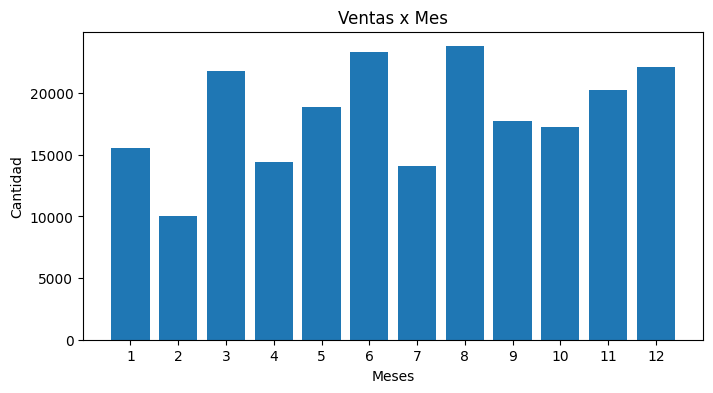

In [26]:


dataf1=data[['Mes1','CANTIDAD']]
q_unid_vend=dataf1.groupby('Mes1').sum('CANTIDAD')
q_unid_vend
#ok hasta aca


x1=q_unid_vend.index.astype('str') #convierto el tipo de dato de Mes de period a str dado q no permite hacerlo como period, ya q acepta str o numerico
y1=q_unid_vend['CANTIDAD']



fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x1,y1 ) #en el ax aplico metodo bar y defino la variable q hace la suma de los campos
ax.set_title('Ventas x Mes')
ax.set_ylabel('Cantidad')

ax.set_xlabel('Meses')
plt.show()


###Vemos con un Grafico de **TORTAS** la representacion de cada Division y el Peso de la Division electrodomesticos sobre el resto 

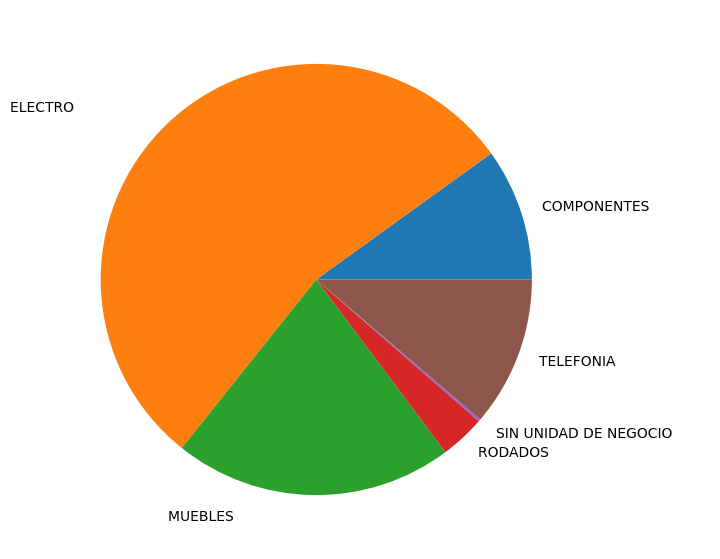

In [27]:

dataf0=data[['GR3','CANTIDAD']]
dataf2=dataf0.groupby('GR3').sum('CANTIDAD')

#type(dataf2['CANTIDAD'])

Divisiones = dataf2.index #en el group by la categoria q agrupa es el indice
 
CANT = dataf2['CANTIDAD']

fig,ax = plt.subplots(figsize =(10, 7))
ax.pie(CANT, labels = Divisiones)
plt.show()

###Vemos a traves de un Grafico de **LINEAS** el aumento de las ventas al final del Año

<Axes: xlabel='Mes', ylabel='IMPORTENETO'>

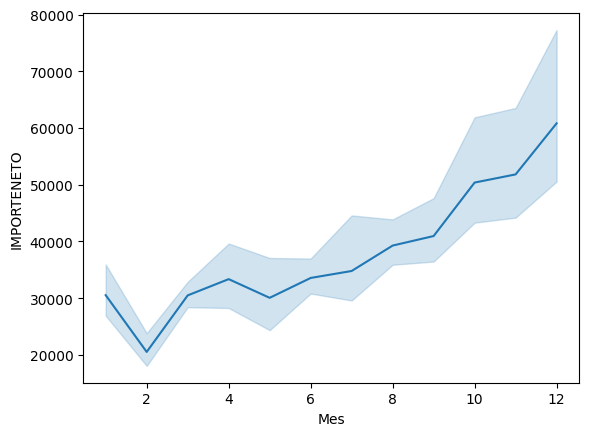

In [28]:
data["Mes"]=data['FECHA'].dt.month #traigo el mes de la fecha, si 

TIPODATO=data['Mes'].dtype #reviso el tipo de dato del campo Mes, es un entero


sns.lineplot(data=data, x="Mes", y="IMPORTENETO") # Axes-level, sobre el dataset filtrado
